**1. Business Question**

Utilizing Python and the transaction data from KPMG to create a cohort that examines user engagement starting from their first transaction.

**2. Dataset Description**
<br>
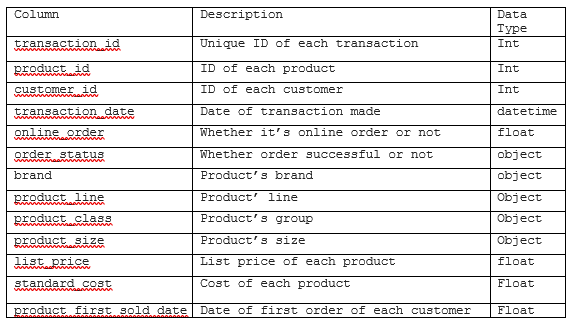
<br>

**3. HOW**
- My main focus will be on conducting Time-based Cohort Analysis.
Customers will be segmented into acquisition cohorts based on the month of **their initial purchase**.
- For each customer's subsequent purchases, a cohort index will be assigned, indicating the number of months elapsed since their first transaction.
- Idea: Calculate **retention rate** by calculating days difference between each order and first order of each unique customer, then use **heatmap** to display calculated retention rate.




In [ ]:
import pandas as pd 
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

transactions=pd.read_excel('/HomeTest 1 - KPMG Data.xlsx')
clean=transactions[transactions['order_status']=='Approved']
transaction=clean.drop_duplicates(subset="transaction_id")
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19821 non-null  int64         
 1   product_id               19821 non-null  int64         
 2   customer_id              19821 non-null  int64         
 3   transaction_date         19821 non-null  datetime64[ns]
 4   online_order             19467 non-null  float64       
 5   order_status             19821 non-null  object        
 6   brand                    19625 non-null  object        
 7   product_line             19625 non-null  object        
 8   product_class            19625 non-null  object        
 9   product_size             19625 non-null  object        
 10  list_price               19821 non-null  float64       
 11  standard_cost            19625 non-null  float64       
 12  product_first_sold_date  19625 n

In [ ]:
def get_day(x): return dt.datetime(x.year, x.month, 1) 
transaction['InvoiceDay'] = transaction['transaction_date'].apply(get_day) 
grouping = transaction.groupby('customer_id')['InvoiceDay'] 
transaction['CohortDay'] = grouping.transform('min')
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDay,CohortDay
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01


In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [ ]:
invoice_year, invoice_month = get_date_int(transaction, 'InvoiceDay')
cohort_year, cohort_month = get_date_int(transaction, 'CohortDay')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
transaction['CohortIndex'] = years_diff * 12 + months_diff + 1
transaction['CohortDay']=transaction['CohortDay'].dt.strftime('%Y-%m')
print(transaction.head())


   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date InvoiceDay CohortDay  \
0       71.49 

In [ ]:
grouping1=transaction.groupby(['CohortDay', 'CohortIndex'])
cohort_data = grouping1['customer_id'].apply(pd.Series.nunique).reset_index()
cohort_counts = cohort_data.pivot(index='CohortDay', columns='CohortIndex', values='customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortDay,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.0,36.5,35.3,38.1,38.9,36.3,38.9,36.5,37.9
2017-02,100.0,40.2,37.1,38.9,35.4,37.1,38.2,35.1,40.6,38.2,36.5,NaN
2017-03,100.0,34.5,35.5,33.9,37.2,38.0,35.7,43.2,38.4,37.2,NaN,NaN
2017-04,100.0,32.6,35.9,45.1,42.1,35.0,42.7,37.1,38.3,NaN,NaN,NaN
2017-05,100.0,40.4,39.0,41.3,34.3,34.3,34.7,39.0,NaN,NaN,NaN,NaN
2017-06,100.0,36.6,35.8,38.2,36.6,36.6,43.9,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,33.8,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,35.3,43.1,35.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,33.3,29.2,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


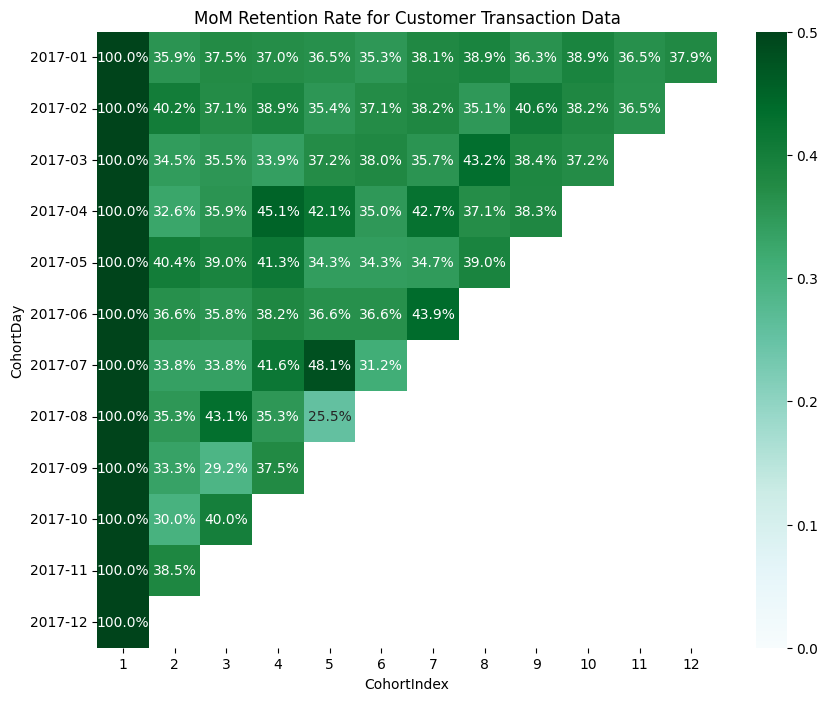

In [ ]:
plt.figure(figsize=(10,8))
plt.title('MoM Retention Rate for Customer Transaction Data')
sns.heatmap(data=retention, annot = True,fmt='.1%', vmin=0.0, vmax=0.5, cmap='BuGn')
plt.show()

Comments:
- hiệu quả duy trì khách hàng khá tốt theo thời gian. tỉ lệ dao động từ 25% - 48%, ko biến động quá nhiều
- 60% người dùng ko quay lại đặt đơn hàng ở tháng tiếp theo sau đơn hàng đầu tiên
-> đây là đợt giảm mạnh nhất trong suốt 12 tháng
-> công ty có 30 ngày để tăng tỉ lệ này, giữ chân nhóm khách mới , ví dụ với ưu đãi dành cho đơn hàng thứ 2...

- khoảng từ thứ 3 đến tháng thứ 5 kể từ đơn hàng đầu tiên, tỉ lệ quay lại của khách tăng từ 2-10% so với tháng thứ 2
-> đây là thời điểm tiếp thị và tương tác với khách hàng, do nhu cầu hoặc hứng thú của khách với sản phẩm của cửa hàng có dấu hiệu gia tăng
-> nếu chăm sóc khách kĩ / có ưu đãi cho khách -> có thể cải thiện đc tỉ lệ giữ chân khách
